In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from numpy import matlib

In [2]:
Data = pd.read_csv('CDS_data.csv',sep=';')
print(type(Data))
Data.head(10)

<class 'pandas.core.frame.DataFrame'>


,ID,Tenor,Spread
0,1,1,23153.150
1,2,1,23932.000
2,3,1,24730.857
3,4,1,25504.470
4,5,1,23260.520
5,6,1,25600.270
6,7,1,23126.643
7,8,1,22847.473
8,9,1,23980.793
9,10,1,23298.000


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      72 non-null     int64  
 1   Tenor   72 non-null     int64  
 2   Spread  72 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.8 KB


In [4]:
Data_raw = Data.to_numpy()
Tenor=Data_raw[:,1]
Spread=Data_raw[:,2]

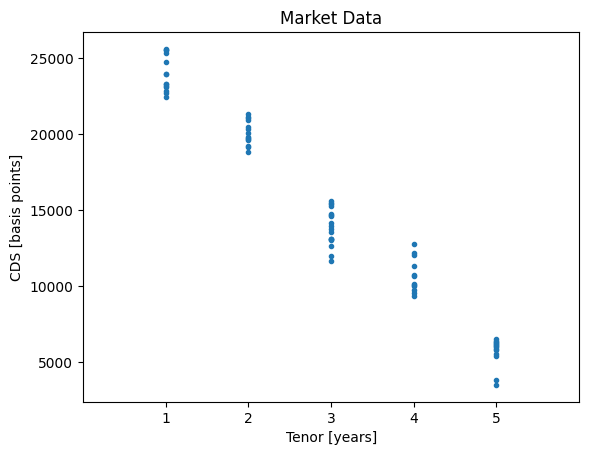

In [5]:
plt.scatter(Tenor,Spread,marker='.')
plt.title('Market Data')
plt.xlabel('Tenor [years]')
plt.ylabel('CDS [basis points]')
plt.xlim((min(Tenor)-1, max(Tenor)+1))
plt.xticks(np.unique(Tenor))
plt.show()

In [6]:
Points=np.zeros([len(Tenor),2])
for i in range(len(Tenor)):
  Points[i,]=np.array([Tenor[i],Spread[i]])
n_clusters=5
kmeans = KMeans(n_clusters).fit(Points)
centroids=kmeans.cluster_centers_
print(centroids)

[[1.00000000e+00 2.39622131e+04]
 [3.84615385e+00 1.07291317e+04]
 [2.00000000e+00 2.00940889e+04]
 [5.00000000e+00 5.69311729e+03]
 [3.05882353e+00 1.40493502e+04]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


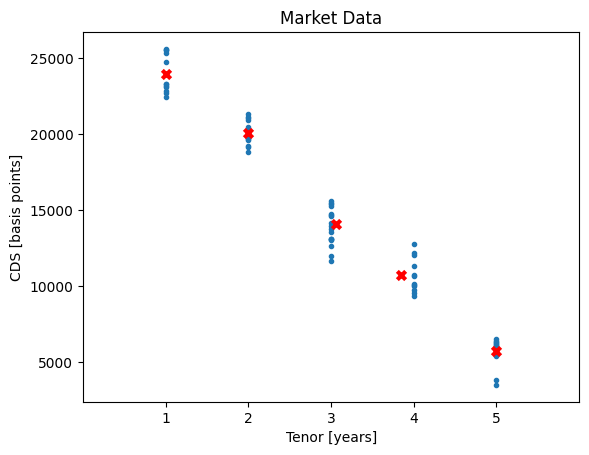

In [7]:
plt.scatter(Tenor,Spread,marker='.')
plt.scatter(centroids[:,0],centroids[:,1],marker='x',linewidth=3,color='r')
plt.title('Market Data')
plt.xlabel('Tenor [years]')
plt.ylabel('CDS [basis points]')
plt.xlim((min(Tenor)-1, max(Tenor)+1))
plt.xticks(np.unique(Tenor))
plt.show()

In [8]:
r=2.11121/100
s= 32729.9199/10000
T=0.5
RR=0.4
lbda=s/(1-RR)
PD=1-np.exp(-lbda*T)
SurvivalProb=1-PD
print(SurvivalProb*100)

6.538297830244977
